In [442]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Leemos el dataframe
df = pd.read_csv('wines.csv')

a) Una recta para predecir la calidad del vino a partir de la característica más relevante (a la que se destinará
mayor proporción del presupuesto), respaldada por su prueba de significancia de regresión, coeficiente de
determinación y correlación lineal

1. Primero debemos conocer la caracteristica mas importante de nuestro dataset.
Para esto podemos calcular el coeficiente de correlación lineal r entre cada característica y la calidad, y elegir la que tenga el valor mas cercano a 1 (correlacion positiva).

In [439]:
def coeficiente_correlacion_lineal(x, y):
    """
    El coeficiente de correlacion lineal tiene la forma:
    r = S_xy / sqr(S_xx * S_yy) 
    """
    S_xy = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    S_xx = np.sum((x - np.mean(x))**2)
    S_yy = np.sum((y - np.mean(y))**2)

    r = S_xy / np.sqrt(S_xx * S_yy)
    
    return r

# Calculamos el maximo coeficiente de correlacion lineal entre las variables
correlaciones = []
max_correlacion = None
max_valor_correlacion = -1
for i in range(0, m):
    correlaciones.append(coeficiente_correlacion_lineal(df['quality'], df.iloc[:, i]))
    if correlaciones[i] > max_valor_correlacion:
        max_valor_correlacion = correlaciones[i]
        max_correlacion = df.columns[i]
print(correlaciones)

[-0.09083483972534322, 0.002928638874578764, -0.10482078139910475, -0.16416152703602807, -0.309506186998833, 0.09118441925512218, 0.4366862682799704]


2. calculamos el coeficiente de determinación R2, que representa e interpreta  la proporcion de variacion y observada que puede ser explicada por el modelo de regresion lineal simple
Para esto necesitamos los parametros de la recta, que se calculan con el metodo de minimos cuadrados.
La ecuación de la recta tendrá la forma y = β0 + β1x, donde y es la calidad del vino y x es la característica elegida.

In [398]:
def coeficiente_pendiente(x, y):
    """
    El coeficiente de pendiente tiene la forma:
    b1 = S_xy / S_xx
    """
    S_xy = np.sum((x - x.mean()) * (y - y.mean()))
    S_xx = np.sum((x - np.mean(x))**2)

    b1 = S_xy / S_xx

    return b1

def coeficiente_interseccion(x, y):
    """
    El coeficiente de interseccion tiene la forma:
    b0 = y.mean() - b1 * x.mean()
    """
    b1 = coeficiente_pendiente(x, y)
    b0 = y.mean() - b1 * x.mean()

    return b0

def coeficiente_determinacion(y, y_pred):
    """
    El coeficiente de determinacion tiene la forma:
    r^2 = 1 - (SCE / STC)
    """
    SCE = np.sum((y - y_pred)**2)
    STC = np.sum((y - np.mean(y))**2)

    r2 = 1 - (SCE / STC)

    return r2

# Calculamos el coeficiente de determinacion
b0 = coeficiente_interseccion(df[max_correlacion], df['quality'])
b1 = coeficiente_pendiente(df[max_correlacion], df['quality'])
r2 = coeficiente_determinacion(df['quality'], b0 + b1 * df[max_correlacion])
n = df.shape[0]
m = df.shape[1] - 1

3. Finalmente Para respaldar la significancia de la regresión, podemos realizar un test de hipótesis sobre el parámetro.
Podemos o no determinar una relacion significativa
entre las variables X y Y al probar si la pendiente B1 es igual a cero.
Si se rechaza la hipotesis nula H0: β1 = 0, entonces se concluye que existe
una relacion significativa entre las variables X y Y

```
Estadistico de prueba para la hipotesis nula H0: β1 = 0
t = B1 / sqrt(S^2 / S_xx)
S^2 = (SCE / n - 2)
SCE = sumatoria(yi - B0 - B1 * xi)^2
```

In [399]:
def estadistico_t(x, y):
    b0, b1 = regresion_lineal(x, y)
    sce = np.sum((y - b0 - b1 * x)**2)
    S = np.sqrt(sce / (x.shape[0] - 2))
    S_xx = np.sum((x - x.mean())**2)
    t = b1 / np.sqrt(S**2 / S_xx)

    return t

# Calculamos el estadistico de prueba
t = estadistico_t(df[max_correlacion], df['quality'])
t_student = stats.t.ppf(0.975, n - 2)

# prueba de hipotesis abs(t) > t_student

El maximo coeficiente de correlacion lineal es: alcohol con 0.4366862682799704
El coeficiente de determinacion es:  0.19069489690428598
Se rechaza la hipotesis nula H0: β1 = 0 y concluimos que existe una relacion significativa entre las variables X y Y


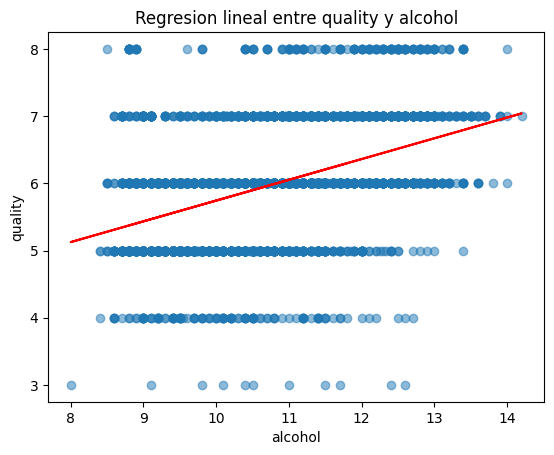

In [407]:
# Mostramos los datos adquiridos
print('El maximo coeficiente de correlacion lineal es:', max_correlacion, 'con', max_valor_correlacion, )
print('El coeficiente de determinacion es: ', r2)
if abs(t) > t_student:
    print("Se rechaza la hipotesis nula H0: β1 = 0 y concluimos que existe una relacion significativa entre las variables X y Y")
else:
    print('No se rechaza la hipotesis nula H0: β1 = 0 y concluimos que no existe una relacion significativa entre las variables X y Y')

# Graficamos la regresion lineal
plt.scatter(df[max_correlacion], df['quality'], alpha=0.5)
plt.plot(df[max_correlacion], b0 + b1 * df[max_correlacion], 'r')
plt.xlabel(max_correlacion)
plt.ylabel('quality')
plt.title('Regresion lineal entre quality y alcohol')
plt.show()

In [401]:
# Una vez realizadas las pruebas, por simplicidad definimos todas las variables de calculo imporantes

# b0 = coeficiente_interseccion(x, y)
# b1 = coeficiente_pendiente(x, y)
# r2 = coeficiente_determinacion(y, y_pred)
# n = df.shape[0]
# m = df.shape[1]
y_pred = b0 + b1 * x
SCE = np.sum((y - y_pred)**2)
S = np.sqrt(SCE / (n - 2))
S_xx = np.sum((x - x.mean())**2)
S_yy = np.sum((y - y.mean())**2)
S_xy = np.sum((x - x.mean()) * (y - y.mean()))
r = S_xy / np.sqrt(S_xx * S_yy)
# t = b1 / np.sqrt(S**2 / S_xx)
# t_student = stats.t.ppf(0.975, n - 2)

i) Las inferencias sobre los parámetros de la recta que estimen las fluctuaciones de las mismas, con una
confianza del 95%


Para realizar inferencias sobre los parámetros de la recta de regresión que estiman las fluctuaciones, con un nivel de confianza del 95%, debemos calcular intervalos de confianza para los coeficientes de la regresión lineal, es decir, para el intercepto b0 y la pendiente b1.

El intervalo de confianza del 95% para un coeficiente se calcula utilizando el valor crítico de la distribución t de Student que corresponde al nivel de confianza y los grados de libertad n-2 y la desviación estándar de los errores estándar de los coeficientes de regresión.

In [402]:
a = 0.05

# Calculamos el intervalo de confianza para la pendiente
def intervalo_confianza_pendiente():
    """
    El intervalo de confianza para la pendiente tiene la forma:
    b1 +- t_student * sqrt(S / S_xx)
    """
    return b1 - t_student * np.sqrt(S / S_xx), b1 + t_student * np.sqrt(S / S_xx)

# Calculamos el intervalo de confianza para la ordenada en el origen
def intervalo_confianza_ordenada():
    """
    El intervalo de confianza para la ordenada en el origen tiene la forma:
    b0 +- t_student * S * sqrt(1 / n + x.mean()**2 / S_xx)
    """
    return b0 - t_student * S * np.sqrt(1 / n + x.mean()**2 / S_xx), b0 + t_student * S * np.sqrt(1 / n + x.mean()**2 / S_xx)

print('El intervalo de confianza para la pendiente es: ', intervalo_confianza_pendiente())
print('El intervalo de confianza para la ordenada en el origen es: ', intervalo_confianza_ordenada())

El intervalo de confianza para la pendiente es:  (0.30890552788689934, 0.3089322210281175)
El intervalo de confianza para la ordenada en el origen es:  (-20842.72029861001, 20848.02800247389)


b) Una ecuación para predecir la calidad del vino a partir de las características.
i) Usando el método de mínimos cuadrados. Con sus respectivos indicadores y una breve explicación de
estas.

In [445]:
def arreglo_y():
    arr = []
    for i in df.columns:
        if i == "quality":
            arr.append(np.sum(df[i].values))
        else:
            arr.append(np.sum(df[i].values * df["quality"].values))
    return np.array(arr)

def matriz_x():
    matriz = []
    for i in df.columns:
        arr = []
        for j in df.columns:
            if i == "quality" and j == "quality":
                arr.append(len(df))
            elif i == "quality":
                arr.append(np.sum(df[j]))
            elif j == "quality":
                arr.append(np.sum(df[i]))
            else:
                arr.append(np.dot(df[i], df[j]))
        matriz.append(arr)
    return np.array(matriz)
        

y = arreglo_y()
x = matriz_x()
b = np.linalg.inv(x).dot(y)

def predict_multiple(b_arr):
    y_multiple = b[0]
    for i in range(1, m):
        y_multiple += b[i] * b_arr[i]
    return np.sum(arr, axis=0)
